<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 115.9 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 154.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 170.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=1b914f021cf25011aa381def739bb13580dbdf0007c989a971000142ba804336
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
Tesla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
tesla_data = Tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(URL).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [12]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [13]:
tables = soup.find_all("table")
tesla_table = tables[1]
data = []
for row in tesla_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2: 
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])
        tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [14]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [15]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [16]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [17]:
GME = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [18]:
gme_data = GME.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [19]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [14]:
!pip install requests
!pip install beautifulsoup4 requests pandas lxml html5lib
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(URL).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [17]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage and store the HTML content
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

try:
    response = requests.get(URL)  # Make the HTTP request
    response.raise_for_status()  # Raise an error if the request fails
    html_data = response.text  # Store HTML content in a variable
    print("Webpage downloaded successfully!")  # Debugging message
except requests.exceptions.RequestException as e:
    print(f"Error fetching the webpage: {e}")

# Step 2: Parse the HTML data using BeautifulSoup
if 'html_data' in locals():  # Ensure html_data is defined
    soup = BeautifulSoup(html_data, "html.parser")

    # Step 3: Find all tables on the page
    tables = soup.find_all("table")
    print(f"Found {len(tables)} tables!")  # Debugging message

    # Step 4: Extract the GameStop revenue table (usually the second table)
    if len(tables) > 1:
        gme_table = tables[1]

        # Step 5: Convert the table to a Pandas DataFrame
        gme_revenue = pd.read_html(str(gme_table))[0]

        # Step 6: Rename columns and clean revenue data
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)

        # Step 7: Display the last five rows
        print(gme_revenue.tail())
    else:
        print("No tables found in the HTML data.")
else:
    print("html_data was not defined. Check your request.")

Webpage downloaded successfully!
Found 6 tables!
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
tables = soup.find_all("table")


gme_table = tables[1]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
data = []

# Extract table rows from the second table
for row in gme_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure the row has two columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Convert list to DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
print(gme_revenue.tail())


          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 173.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 151.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 137.2 MB/s eta 0:00:00


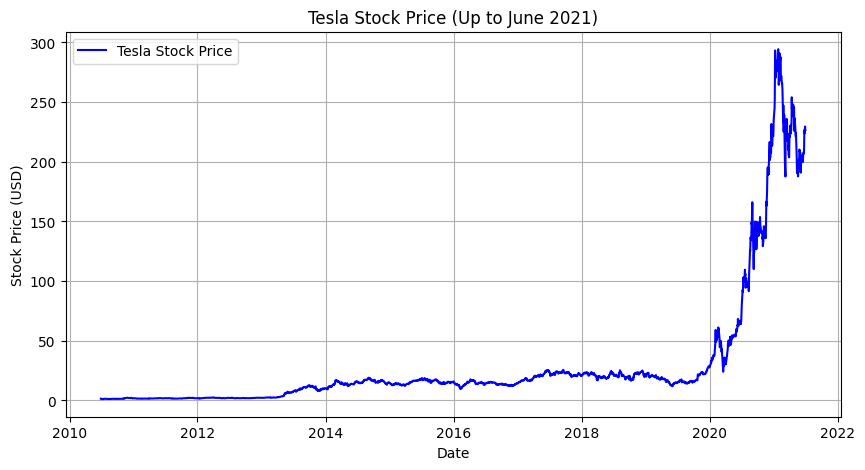

In [12]:
!pip install matplotlib
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Tesla Stock Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

tesla_data_filtered = tesla_data[tesla_data["Date"] <= "2021-06-30"]
make_graph(tesla_data_filtered, "Tesla Stock Price (Up to June 2021)")

In [18]:
import plotly.graph_objects as go
import pandas as pd
import yfinance as yf

# Fetch Tesla Stock Data
Tesla = yf.Ticker("TSLA")
tesla_data = Tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Create the figure
fig = go.Figure()

# Add stock price line
fig.add_trace(go.Scatter(x=tesla_data["Date"], y=tesla_data["Close"],
                         mode="lines", name="Stock Price"))

# Add range slider
fig.update_layout(
    title="Tesla Stock Price (Historical)",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    xaxis_rangeslider_visible=True
)

# Show the figure
fig.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [20]:
import yfinance as yf
GME = yf.Ticker("GME")
gme_data = GME.history(period="max")
gme_data.reset_index(inplace=True)

!pip install lxml


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [24]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(URL).text

In [25]:
soup = BeautifulSoup(html_data, "html.parser")

In [26]:
tables = soup.find_all("table")

AttributeError: 'America/New_York' object has no attribute 'update'

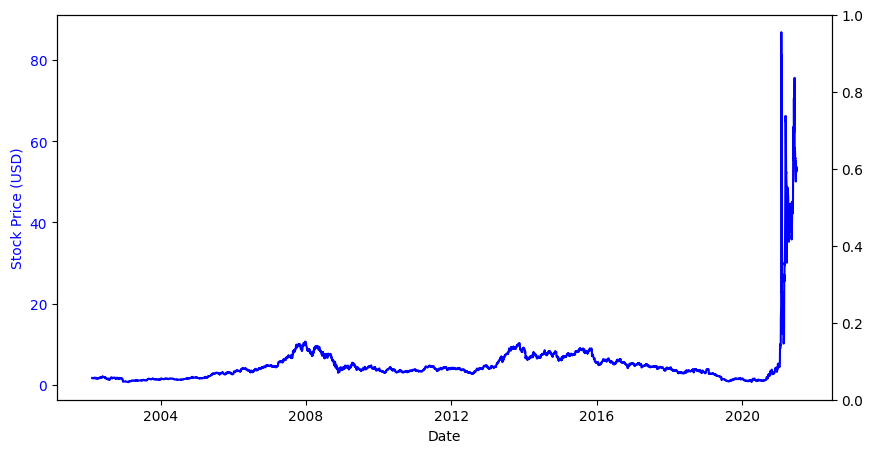

In [31]:
gme_table = tables[1]
gme_revenue = pd.read_html(str(gme_table))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_data_filtered = gme_data[gme_data["Date"] <= "2021-06-30"]
gme_revenue_filtered = gme_revenue[gme_revenue["Date"] <= "2021-06-30"]
make_graph(gme_data_filtered, gme_revenue_filtered, "GameStop Stock Price & Revenue (Up to June 2021)")

In [21]:
import pandas as pd
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup

# Function to fetch and clean data
def get_stock_data(url):
    df = pd.read_csv(url)
    df["Date"] = pd.to_datetime(df["Date"])
    return df[df["Date"] <= "2021-06-30"]  # Filter data up to June 2021

def get_revenue_data(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    tables = soup.find_all("table")
    gme_table = tables[1]  # Get the correct table
    df = pd.read_html(str(gme_table))[0]
    
    df.columns = ["Date", "Revenue"]
    df["Date"] = pd.to_datetime(df["Date"])
    df["Revenue"] = df["Revenue"].replace("[\$,]", "", regex=True).astype(float)
    
    return df[df["Date"] <= "2021-06-30"]  # Filter data

# URLs for stock price & revenue data
gme_stock_url = "https://example.com/gme_stock.csv"  # Replace with actual link
gme_revenue_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch Data
gme_data = get_stock_data(gme_stock_url)
gme_revenue = get_revenue_data(gme_revenue_url)

# Create Figure
fig = go.Figure()

# Add GameStop Stock Price
fig.add_trace(go.Scatter(x=gme_data["Date"], y=gme_data["Close"], mode="lines", name="Stock Price", line=dict(color="blue")))

# Add Revenue as a separate subplot
fig.add_trace(go.Scatter(x=gme_revenue["Date"], y=gme_revenue["Revenue"], mode="lines", name="Revenue", line=dict(color="purple"), yaxis="y2"))

# Layout with Range Slider
fig.update_layout(
    title="GameStop Stock Price and Revenue",
    xaxis=dict(title="Date", rangeslider=dict(visible=True), type="date"),
    yaxis=dict(title="Stock Price (USD)", side="left"),
    yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right")
)

# Show Figure
fig.show()

HTTPError: HTTP Error 404: Not Found

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
